In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix  

In [4]:
titanic_df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Tasks\\Task 1\\tested.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
titanic_df.duplicated().sum()

0

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic_df.shape

(418, 12)

In [9]:
titanic_df['Cabin'].isnull().sum()/ titanic_df.shape[0] * 100

78.22966507177034

## Data Cleaning and Preprocessing

columns which are need to clean
1. Cabin -- 327 null values
2. Age   -- 86 null values
3. Fare  -- 1 null vaule
4. Ticket  -- object 
5. Name -- object

In [10]:
# Drop Cabin and Ticket columns because majority values is empty 
titanic_df.drop(['Cabin', 'Ticket'], inplace = True, axis = 1)
titanic_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [11]:
# Fare has only one null values
mean_fare = titanic_df['Fare'].mean()
titanic_df['Fare'].fillna(mean_fare, inplace= True)
titanic_df['Fare'].isnull().sum()

0

### Before Encoding

In [12]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [13]:
titanic_df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

### Label Encoding 

In [14]:
labelencoding = preprocessing.LabelEncoder()
titanic_df["Sex"] = labelencoding.fit_transform(titanic_df["Sex"])
titanic_df["Embarked"] = labelencoding.fit_transform(titanic_df["Embarked"])

### After Encoding

In [15]:
titanic_df["Sex"].unique()  # male is 1, female is 0

array([1, 0])

In [16]:
titanic_df["Embarked"].unique()  # Q is 1, S is 2, C is 0

array([1, 2, 0])

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int32  
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(1)
memory usage: 29.5+ KB


In [18]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.401914
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.840500,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [19]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

### Check unique values in columns

In [20]:
columns_unique = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
for columns in titanic_df[columns_unique]:
    unique_values = titanic_df[columns].unique()
    print(f"Unique Values in '{columns}' Column:", unique_values)

Unique Values in 'Survived' Column: [0 1]
Unique Values in 'Pclass' Column: [3 2 1]
Unique Values in 'Sex' Column: [1 0]
Unique Values in 'SibSp' Column: [0 1 2 3 4 5 8]
Unique Values in 'Parch' Column: [0 1 3 2 4 6 5 9]
Unique Values in 'Embarked' Column: [1 2 0]


## Data Visualization

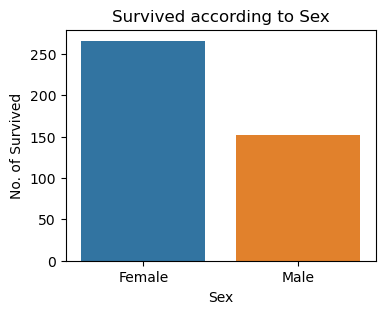

In [24]:
# male is 1, female is 0
plt.figure(figsize = (4, 3))
sb.countplot(titanic_df, x = "Survived")
plt.title("Survived according to Sex")
plt.xlabel("Sex")
plt.ylabel("No. of Survived")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

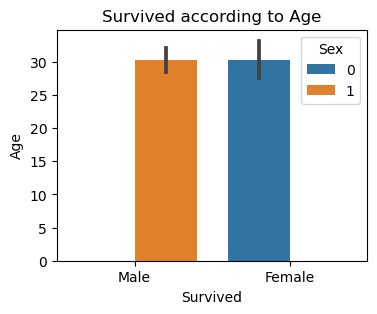

In [27]:
plt.figure(figsize = (4, 3))
sb.barplot(x = 'Survived', y = 'Age', hue = 'Sex', data = titanic_df)
plt.title('Survived according to Age')
plt.ylabel("Age")
plt.xticks([1, 0], ['Female', 'Male'])
plt.show()

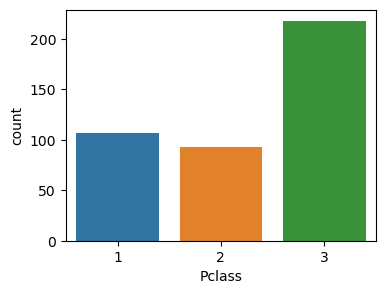

In [30]:
plt.figure(figsize = (4, 3))
sb.countplot(x = 'Pclass', data = titanic_df)
plt.show()

In [600]:
# Pair Plot
# sb.pairplot(titanic_df, hue='Sex', palette='viridis')
# plt.show()

<Axes: ylabel='Count'>

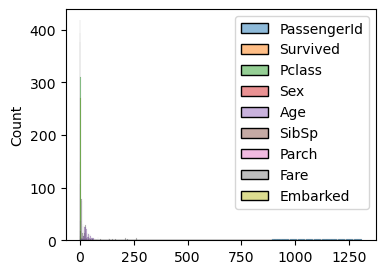

In [601]:
plt.figure(figsize = (4, 3))
sb.histplot(titanic_df)

### Dropping non-essential columns

In [602]:
updated_df = titanic_df.drop(['Name','PassengerId'], axis = 1)

## Correlation and Relationships

<Axes: >

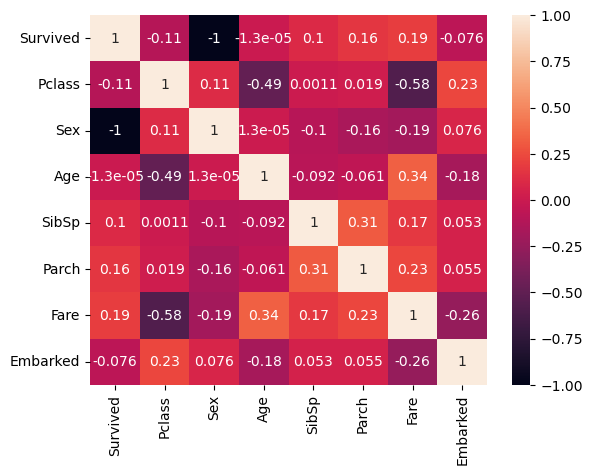

In [603]:
sb.heatmap(updated_df.corr(), annot = True)

## Create a simple linear regression model to predict Age
Age feature has 86 null Values

In [604]:
df = updated_df.dropna(subset=['Age'])  # clean Age column null values

In [605]:
model = LinearRegression()
y_train = df['Age']              # store predict column in y_train
X_train = df.drop('Age', axis = 1)

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [606]:
# drop missing values in age column
X_missing = updated_df[updated_df['Age'].isnull()].drop('Age', axis=1)  

# predict the model
predicted_ages = model.predict(X_missing)

# Set predicted values in dataset
updated_df.loc[updated_df['Age'].isnull(), 'Age'] = predicted_ages

In [610]:
updated_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2


In [611]:
titanic_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

## Spit the data

In [613]:
X = updated_df.drop('Survived', axis = 1)
y = updated_df['Survived']

In [614]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 51)
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(332, 7)
(84, 7)
(334,)
(84,)


In [615]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Logistic regression

In [616]:
logisticreg = LogisticRegression()
logisticreg.fit(x_train, y_train)

LogisticRegression()

In [617]:
# predict 
logistic_predict = logisticreg.predict(x_test)
logistic_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [618]:
# Accuarcy
logistic_score = logisticreg.score(x_test, y_test)
logistic_score

1.0

In [619]:
logisticreg.predict([[2, 1, 24, 1, 1, 200, 2]])

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [620]:
logisticreg.predict([[3, 1, 24, 0, 0, 7.8, 2]])

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [621]:
updated_df.Age[10]

24.94313982789786

### Confusion matrix for logistic regression

<Axes: >

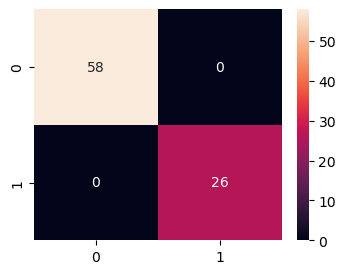

In [637]:
plt.figure(figsize =(4, 3))
cm = confusion_matrix(y_test, logistic_predict)
sb.heatmap(cm, annot = True)

### feature Scaling 

In [623]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

## Decision Tree

In [625]:
classifier= DecisionTreeClassifier(criterion='entropy')  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy')

In [627]:
# predict
y_pred= classifier.predict(x_test)  
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [628]:
# accuracy
decisiontree_accuracy = classifier.score(x_test, y_test)
decisiontree_accuracy

1.0

### Confusion matrix for Decision Tree

<Axes: >

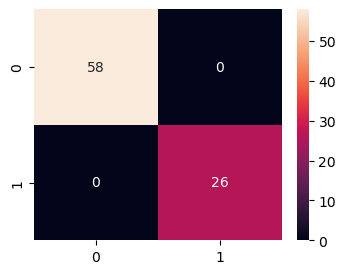

In [639]:
plt.figure(figsize = (4, 3))
sm = confusion_matrix(y_test, y_pred)
sb.heatmap(sm, annot = True)